**Автоэнкодер**

Для начала, нам понадобится импортировать несколько необходимых библиотек:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.utils import plot_model

Загрузка данных:


In [98]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x / 255
test_x = test_x / 255

train_x = np.reshape(train_x, (len(train_x), 28 * 28))
test_x = np.reshape(test_x, (len(test_x), 28 * 28))

Описание слоёв:



In [99]:
inputs = Input(shape = (28*28, ))
x = Dense(150, activation='relu', name = 'relu1')(inputs)
x = Dense(40, activation='relu', name = 'relu2')(x)
x = Dense(10, activation='relu', name = 'relu3')(x)
encoder = Dense(3, activation='linear', name = 'linear')(x)

inputs_dec = Input(shape = (3, ))
x = Dense(10, activation='relu', name = 'relu4')(inputs_dec)
x = Dense(40, activation='relu', name = 'relu5')(x)
x = Dense(150, activation='relu', name = 'relu6')(x)
decoder = Dense(28*28, activation='relu', name = 'relu7')(x)

Создание модели автоэнкодера

In [100]:
encoder_model = keras.Model(inputs, encoder)
decoder_model = keras.Model(inputs_dec, decoder)
autoenc = keras.Model(inputs, decoder_model(encoder_model(inputs)))

ОБЩЕЕ КОЛИЧЕСТВО ОБУЧАЕМЫХ ПАРАМЕТРОВ

In [101]:
input_shape = (28*28,)  # Размерность входного изображения
encoder_layers = [150, 40, 10, 3]  # Размеры слоев кодирования
decoder_layers = [10, 40, 150, 28*28]  # Размеры слоев декодирования

#Расчет общего количества обучаемых параметров в encoder
encoder_trainable_params = 0
for i in range(len(encoder_layers)-1):
    prev_layer_size = encoder_layers[i]
    curr_layer_size = encoder_layers[i+1]
    encoder_trainable_params += (prev_layer_size * curr_layer_size) + curr_layer_size

#Расчет общего количества обучаемых параметров в decoder
decoder_trainable_params = 0
for i in range(len(decoder_layers)-1):
    prev_layer_size = decoder_layers[i]
    curr_layer_size = decoder_layers[i+1]
    decoder_trainable_params += (prev_layer_size * curr_layer_size) + curr_layer_size

#Общее количество обучаемых параметров
total_trainable_params = encoder_trainable_params + decoder_trainable_params

print("Общее количество обучаемых параметров:", total_trainable_params)

Общее количество обучаемых параметров: 131457


Изображение послойной архитектуры НС

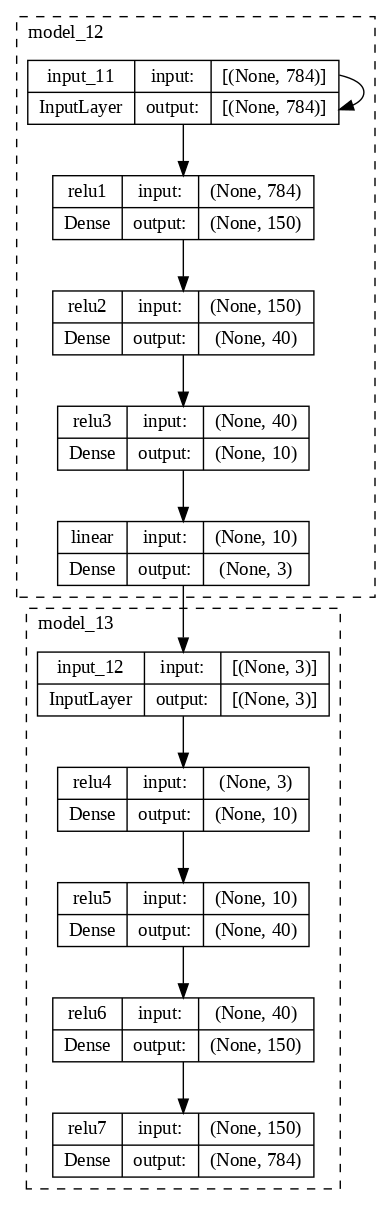

In [103]:
plot_model(autoenc, expand_nested=True, show_shapes = True, show_layer_names=True, dpi = 100)

Компиляция модели:

In [ ]:
autoenc.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Обучение модели:

In [ ]:
history = autoenc.fit(train_x, train_x, epochs=25, batch_size=100, validation_split=0.2)

Epoch 1/25
480/480 [==============================] - 9s 13ms/step - loss: 0.0558 - accuracy: 0.0114 - val_loss: 0.0469 - val_accuracy: 0.0120
Epoch 2/25
480/480 [==============================] - 7s 15ms/step - loss: 0.0434 - accuracy: 0.0100 - val_loss: 0.0414 - val_accuracy: 0.0108
Epoch 3/25
480/480 [==============================] - 6s 12ms/step - loss: 0.0408 - accuracy: 0.0089 - val_loss: 0.0402 - val_accuracy: 0.0099
Epoch 4/25
480/480 [==============================] - 7s 14ms/step - loss: 0.0397 - accuracy: 0.0096 - val_loss: 0.0391 - val_accuracy: 0.0124
Epoch 5/25
480/480 [==============================] - 6s 12ms/step - loss: 0.0384 - accuracy: 0.0096 - val_loss: 0.0382 - val_accuracy: 0.0080
Epoch 6/25
480/480 [==============================] - 6s 12ms/step - loss: 0.0377 - accuracy: 0.0102 - val_loss: 0.0377 - val_accuracy: 0.0107
Epoch 7/25
480/480 [==============================] - 6s 12ms/step - loss: 0.0372 - accuracy: 0.0104 - val_loss: 0.0370 - val_accuracy: 0.0120

In [ ]:
# Renders the charts for training accuracy and loss.
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Validation set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Validation set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

Графики loss и accuracy для train и val датасетов:

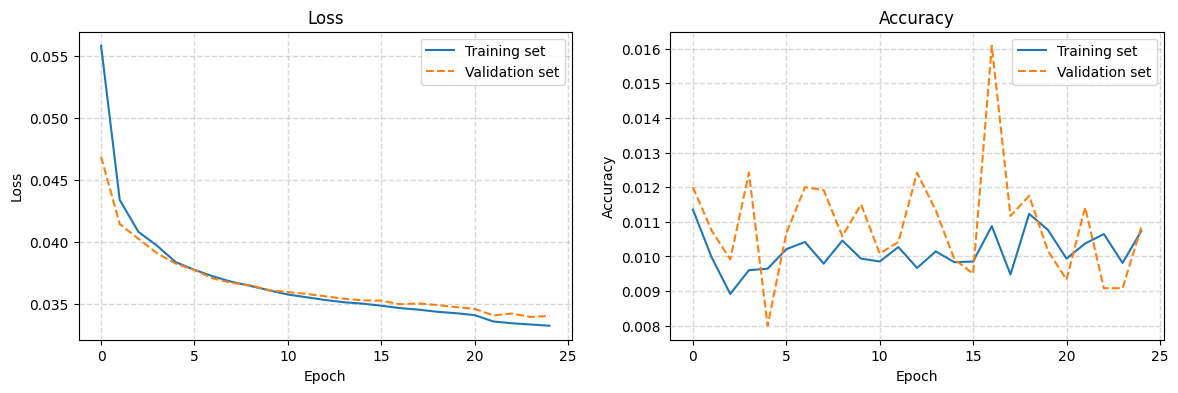

In [ ]:
render_training_history(history)

loss и accuracy для test датасета:

In [ ]:

autoenc.evaluate(test_x, test_x)

313/313 [==============================] - 1s 3ms/step - loss: 0.0339 - accuracy: 0.0097


[0.03392602875828743, 0.009700000286102295]

Сохраняем результаты на тестовой выборке:

In [ ]:
predictions = autoenc.predict(test_x)

313/313 [==============================] - 1s 3ms/step


Представим в более удобной форме:

In [ ]:
predictions = predictions.reshape(10000, 28, 28) # 28 на 28 для графиков

Отобразим 20 элементов:

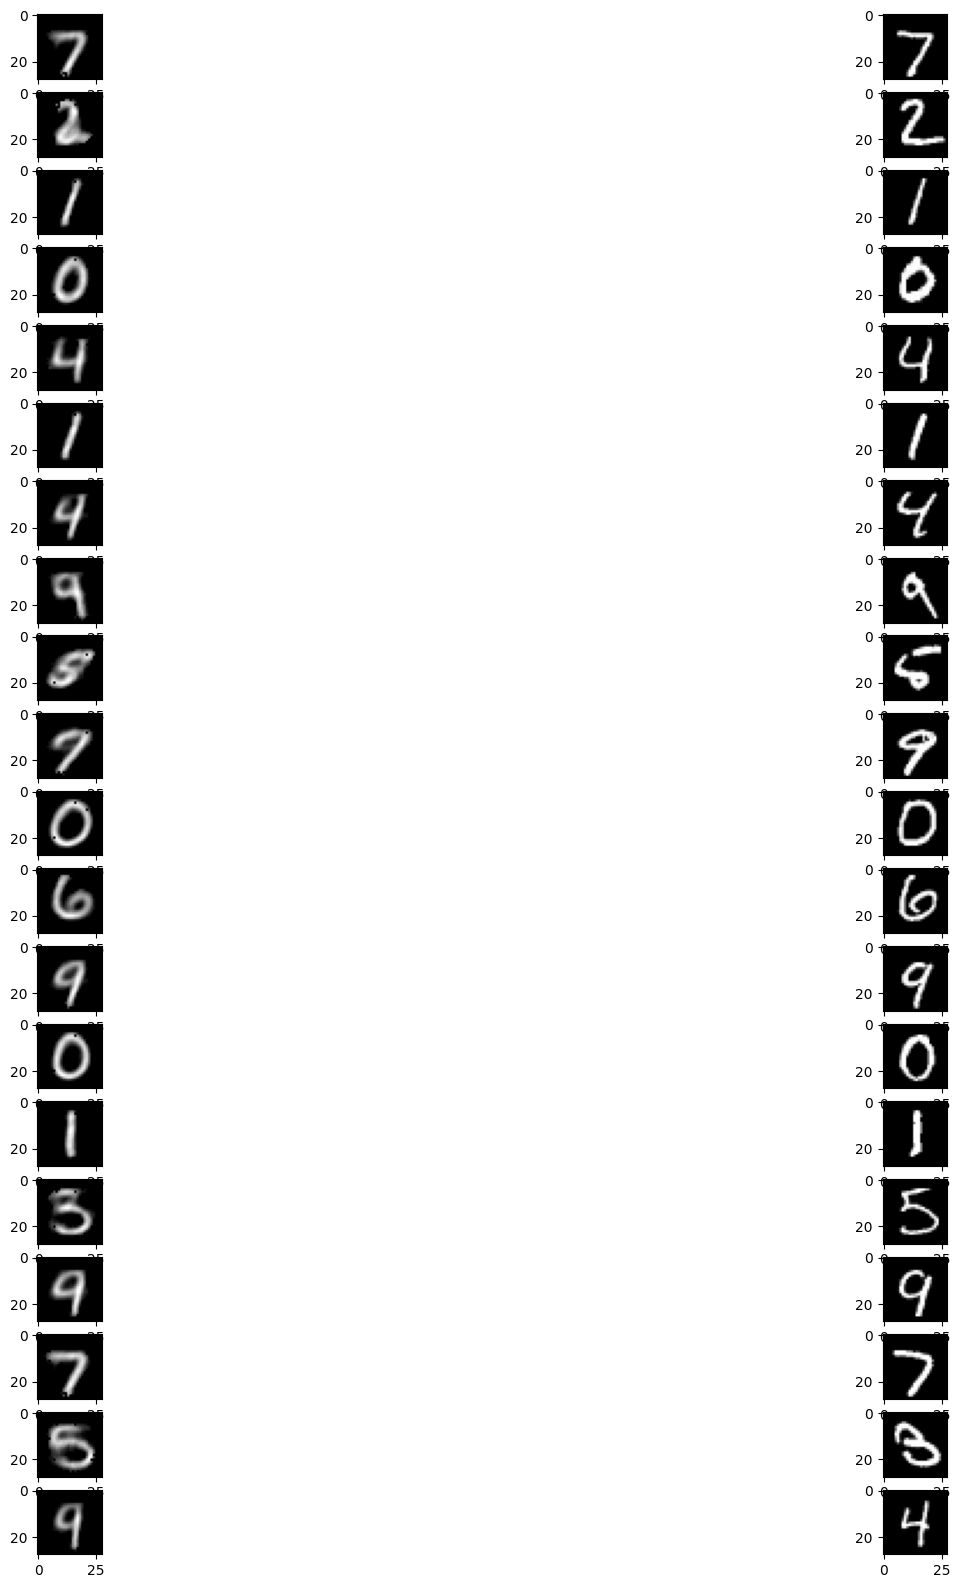

In [ ]:
plt.figure(figsize=(20, 20))

for i in range(20):
    k = i * 2
    plt.subplot( 20, 2, k+1)
    plt.imshow(predictions[i], cmap = 'gray')
    plt.subplot( 20, 2, k+2)
    plt.imshow(test_x[i].reshape(28,28), cmap = 'gray')

plt.show()

Сохранение модели

In [ ]:
from google.colab import drive
drive.mount('/content/drive/mydrive')

Drive already mounted at /content/drive/mydrive; to attempt to forcibly remount, call drive.mount("/content/drive/mydrive", force_remount=True).


In [ ]:
autoenc.save("/content/drive/mydrive/MyDrive/model-autoencoder")